# Parameter Estimation

We often have the following problem: we observe data $x_0, x_1, \ldots, x_{N-1}$ that come from some common underlying distribution, $F_X(x)$. However, the details of the underlying distribution are not completely known. In this section, we consider the problem of estimating parameters of the distribution, such as the mean and variance. Let $\theta$ denote some parameter of the distribution that we wish to estimate. Then there are two different philosophies for how to treat $\theta$, and these different philosophies result in different mathematical approaches:
* $\theta$ can be treated as constant, but unknown. The parameter $\theta$ is not considered deterministic (not random). This is considered *classical parameter estimation* and is the approach taken in this section.
* $\theta$ can be considered to be random. This typically results in a Bayesian approach to parameter estimation in which the *a posteriori* distribution for $\theta$ is determined from the data and some *a priori* distribution on $\theta$. 

In this section, the discussion and examples use continuous random variables, so the mathematics will use density functions $f_X(x)$. In most cases the results generalize to discrete random variables if the pdf are replaced by PMFs.  It is helpful to make explicit the effect on the density function of the parameter(s) being estimated; i.e., we want to show that the density at some point $x$ depends on $\theta$. We will use $f_X(x;\theta)$ to make this effect clear. We do not use use a conditioning bar ($|$) here because $\theta$ is not a value of a random variable.

The correct way to interpret $f_X(x;\theta)$ is that it represents a family of density functions for different values of $\theta$. For instance, if $\theta$ is the parameter of an exponential random variable, then some of the possible density functions are shown below:


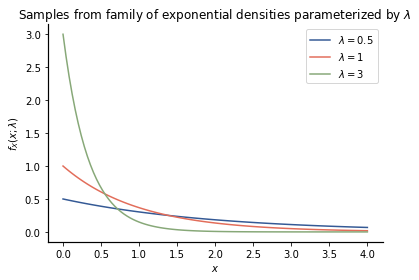

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x = np.linspace(0,4, 101)

for l in [0.5, 1, 3]:
  X = stats.expon(scale=1/l)
  plt.plot(x, X.pdf(x), label=f'$\lambda={l}$' )
  
plt.title('Samples from family of exponential densities parameterized by $\lambda$')
plt.xlabel('$x$')
plt.ylabel('$f_X(x;\lambda)$')
plt.legend();

Now suppose we have samples from some exponential density $f_X(x;\lambda)$? How should we estimate $\lambda$? More generally, how should we estimate $\theta$ from the observations $x_0, x_1, \ldots, x_{N-1}$? First, let's simplify the notation for the observations by writing them as a *vector*:

````{card}
DEFINITION
^^^
```{glossary}
vector
    An ordered list of numbers, usually shown enclosed in square brackets and separated by commas.
```
````



Vectors are similar to Python's lists and tuples. In this text, we will use bold, lower-case letters to denote vectors. For instance, we can write a vector of the squares of the first five  counting numbers as $\mathbf{x} = \left[ 1, 4, 9, 16, 25\right]$. Since it is hard to handwrite bold letters, we will use underlined lower-case letters to represent vectors when we write them by hand. We will collect our observed data into a vector

$$
\mathbf{x} = \left[ x_0, x_1, \ldots, x_{N-1} \right].
$$


We wish to estimate $\theta$ from $\mathbf{x}$. We will use "hats" on an item to indicate that item is being estimated.

````{card}
DEFINITION
^^^
```{glossary}
estimate
    Given a vector of observed values $\mathbf{x}$ from a common distribution, an *estimate* for a parameter $\theta$ is a numerical value $\hat{\theta}$ that is a function of the observed data.
```
````



Given the data $\mathbf{x}$, let the estimate for $\theta$ be the value of a function evaluated on the data, $\hat{\theta}= g(\mathbf{x})$. Then the main problem of parameter estimation is how to choose a **good** function. Rather than choose a function for one specific set of data $\mathbf{x}$, we want to choose a function that will have good properties for any data. In this case, the data itself becomes a vector of random variables, which we will denote by a bold upper-case letter. The random data is then $\mathbf{X} = \left[ X_0, X_1, \ldots, X_{N-1} \right].$ If we apply a function to the data to create an estimated value, its output will itself be a random variable, which we call an *estimator*:

````{card}
DEFINITION
^^^
```{glossary}
estimate
    Given a vector of random variables $\mathbf{X}$ from a common distribution, an *estimator* for a parameter $\theta$ of the distribution is a random variable $\hat{\Theta}$ that is a function of the random variables.
```
````



If our estimator is $\hat{\Theta} = g(\mathbf{X})$, then we wish to choose the function $g()$ such that the estimator has good properties. However, we need to define what we mean by "good". Our first step is to introduce some additional terminology.


## Terminology

Let $\mathbf{X}$ be random variables from a common distribution with parameter $\theta$ and let $\hat{\Theta}=g(\mathbf{X})$ be an **estimator** for  $\theta$. Then we define the following term:

* The **estimator error** is  $\hat{\Theta} - \theta$.


* The **estimator bias** is the difference between the mean value of the estimator and the true value of the parameter, $ E[\hat{\Theta}] - \theta$

* An estimator is said to be **unbiased** if $E[\hat{\theta}] = \theta$; i.e. if the estimator bias is zero.


## Estimating Mean and Variance

Suppose that $X=\{X_1,X_2,\cdots, X_N\}$ are independent observations that come from a common distribution. For our purposes, we do not define provide a technical definition for independence of multiple random variables. Informally, independence generally means:
* the randomness associated with different random variables came from separate random sources, and
* knowing the value of one or more of the random variables does not change the distribution of any of the remaining random variables.

### Estimating the Mean

Let $\mu_X$ denote the mean of the random variables. Then $\mu_X$ is usually estimated via the **sample mean**, 

$$
\hat{\mu}_X = \frac{1}{N} \sum_{i=0}^{N-1} X_i
$$

The expected value of the sample mean estimator is 

\begin{align*}
E\left[\hat{\mu}_X \right]
&= E \left[\frac{1}{N} \sum_{i=0}^{N-1} X_i\right]\\
&=\frac{1}{N} \sum_{i=0}^{N-1} E \left[ X_i\right] ~~~(\mbox{by linearity})\\
&=\frac{1}{N} \sum_{i=0}^{N-1} \mu_X \\
&= \mu_X
\end{align*}
  
Thus, this estimator is **unbiased**.

In addition, the sample mean estimator can be shown to be the estimator that minimizes the sum of the mean-square errors to the data,
\begin{equation*}
\min_c E \left[ \sum_{i=0}^{N-1} (X_i -c)^2 \right] = \hat{\mu}_X.
\end{equation*}

(The derivation is not hard, but is outside the scope of this text. It follows by expanding the quadratic term, applying linearity of the expectation operator, taking the derivative of the left-hand side of the equation with respect to $c$, setting the result to 0, and then solving for $c$.)

The sample mean estimator converges to the true mean if the variance of the distribution is finite. Below is a graph that shows the sample mean estimate as a function of the number of random values used to create the estimate, when the sample mean estimate is computed on subsets of a set of 1,000 random values from a Normal(1, 2) distribution:

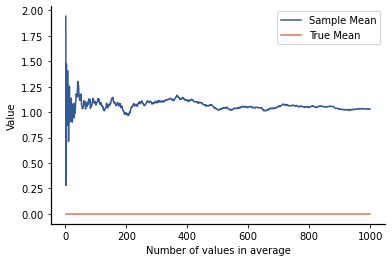

In [2]:
seed =  1234
np.random.seed(seed)
X = stats.norm(1, 2)
Xvals = X.rvs(1_000)
sums = np.cumsum(Xvals)
avgs = sums/np.arange(1, 1001)

plt.plot(np.arange(1, 1001), avgs, label='Sample Mean')
plt.xlabel('Number of values in average');
plt.ylabel('Value');
plt.plot(np.arange(1,1001), [0]*1000, label='True Mean');
plt.legend();

**Evaluating bias via simulation**

Let's consider again what it means for the average (sample mean) to be an unbiased estimator. **It does not mean that the average converges to the true mean for large $N$ -- unbiased has nothing to do with the number of samples in the data.** Instead, it means that for any $N$, the expected value of the average is equal to the true mean. 

We can check estimate the expected value of an estimator through simulation by calculating the value of the estimator for many different random samples. Then the expected value of the estimator is the average over all of those samples. Below is a simulation that estimates the expected value of the sample mean estimator for $N=10$:

In [3]:
num_sims = 100_000
data_size = 10 # This is our N
X = stats.norm(1, 2)

total_avg = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  avg = Xvals.mean()
  total_avg += avg
  
print('The estimated mean of the sample mean estimator is'
      +f'{total_avg/num_sims: 0.2f}')

The estimated mean of the sample mean estimator is 1.00


The estimated mean of the sample mean estimator is equal to the true mean, so this matches our theoretical result: the sample mean estimator is unbiased.

### Estimating the Variance

Let $\sigma_{X}^{2}$ denote the variance of the random variables. Then there are two cases that should be considered for estimating the variance. 


**Known Mean:** First consider the case where the mean of the random variables, $\mu_X$, is known. Let the sample variance estimator for this case be defined by

```{math}
:label: sample_variance1
\hat{\sigma^2_X} = \frac{1}{N}\sum_{i=1}^N (X_i-\mu_X)^2.
```

The expected value of the sample variance estimator is 
\begin{align*}
E \left[\hat{\sigma^2_X} \right] &=E \left[ \frac{1}{N}\sum_{i=1}^N (X_i-\mu_X)^2 \right] \\
&=  \frac{1}{N}\sum_{i=1}^N E \left[(X_i-\mu_X)^2 \right] ~~~ (\mbox{by linearity})\\
&= \frac{1}{N}\sum_{i=1}^N \sigma_{X}^{2} \\
&= \sigma_{X}^2.
\end{align*}

So if the mean is known, the sample variance estimator in {eq}`sample_variance1` is an unbiased estimator and is commonly used for this purpose.

As with the sample mean estimator, let's conduct a simulation to confirm the result that the sample variance estimator is unbiased. 

In [4]:
num_sims = 100_000
data_size = 10 # This is our N
X = stats.norm(1, 2)

total_var = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  var = ((Xvals-1)**2).mean()
  total_var += var
  
print('The estimated mean of the sample variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

The estimated mean of the sample variance estimator is 4.00


The estimated mean of the sample variance estimator matches the true variance (4), so this confirms the theoretical result that the sample variance estimator is unbiased.


**Unknown Mean:** 

Now consider the case where the variance of the data is being estimated when the mean is unknown. If we want to apply the sample variance estimator of the form in {eq}`sample_variance1`, we will have to replace the true value of $\mu_X$ with its estimator, giving 

```{math}
:label: sample_variance2
\hat{\sigma^2_X} = \frac{1}{N}\sum_{i=1}^N (X_i-\hat{\mu}_X)^2.
```

Let's run a simulation to check if this is an unbiased estimator:

In [5]:
num_sims = 100_000

data_size = 10 # This is our N
X = stats.norm(1, 2)

total_var = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  avg = Xvals.mean()
  var = ((Xvals-avg)**2).mean()
  total_var += var
  
print('The estimated mean of the sample variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

The estimated mean of the sample variance estimator is 3.61


The estimated mean of the sample variance estimator is now not close to the true mean! If you rerun this block, you may see different values, but each value should be close to 3.6. This may seem surprising, but to see if this estimator is unbiased, we would need to calculate
```{math}
:label: bias_sample_var
E \left[ \frac{1}{N}\sum_{i=0}^{N-1} \left(X_i- \sum_{k=0}^{N-1} X_k \right)^2 \right].
```

Evaluating this expectation is somewhat tricky, but it can be evaluated in closed form, and the value of {eq}`bias_sample_var` is $\sigma^2 (N-1)/N$. That is, this estimator produces a value that is biased too low by a factor of $(N-1)/N$. This matches our simulation example, which for a sample size of 10 was biased too low by a factor $(10-1)/10= 0.9$. 

NumPy has a built in variance estimator called `np.var()`. Let's rerun our simulation using `np.var()` to see if we encounter the same issue:


In [6]:
num_sims = 100_000

data_size = 10 # This is our N
X = stats.norm(1, 2)

total_var = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  var = Xvals.var()
  total_var += var
  
print('The estimated mean of the sample variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

The estimated mean of the sample variance estimator is 3.61


Again, we see that the result is biased too low by a factor of $(N-1)/N$. Fortunately, this is very easy to fix if we want an unbiased estimator. We just multiply the previous estimator by a factor of $N/(N-1)$, which yields the following unbiased estimator when the true mean is unknown:
```{math}
:label: sample_variance3
\hat{\sigma^2_X} = \frac{1}{N-1}\sum_{i=1}^N (X_i-\hat{\mu}_X)^2.
```
The change in denominator is often referred to a *degrees of freedom (dof) correction*. A detailed discussion of dof is beyond the scope of this text, but we can basically think that we started with a number of dof equal to the size of our data and used one in calculating the sample mean. 

Because a dof correction is so common in calculating the sample variance, NumPy supports passing a `ddof` parameter to `np.var()`, where `ddof` is the "Delta Degrees of Freedom". In other words, we don't need to pass $N-1$, we only need to pass the difference from $N$, which is `ddof=1`. Let's test this via simulation:

In [7]:
num_sims = 100_000

data_size = 10 # This is our N
X = stats.norm(1, 2)

total_var = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  var = Xvals.var(ddof = 1)
  total_var += var
  
print('The estimated mean of the sample variance estimator is' +
      f'{total_var/num_sims: 0.2f}')

The estimated mean of the sample variance estimator is 4.00


The result is now unbiased. Note, however, that this is a price to pay for having an unbiased estimator of the variance. Let's compute the mean-square error for the  biased and unbiased estimators using simulation:

In [8]:
num_sims = 100_000

data_size = 10 # This is our N
X = stats.norm(1, 2)

total_error_biased = 0
total_error_unbiased = 0

for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  
  var_biased = Xvals.var()
  total_error_biased += (var_biased - X.var())**2
  
  var_unbiased = Xvals.var(ddof = 1)
  total_error_unbiased += (var_unbiased - X.var())**2


  
print('MSE of biased variance estimator is' +
      f'{total_error_biased/num_sims: 0.2f}')
print('MSE of unbiased variance estimator is' +
      f'{total_error_unbiased/num_sims: 0.2f}')

MSE of biased variance estimator is 3.04
MSE of unbiased variance estimator is 3.55


This is an example of a property called the bias-variance tradeoff that plays an important role in statistics and machine learning problems.  Even though the unbiased estimator produces a higher MSE, we will still use the unbiased variance estimator in {eq}`sample_variance3` whenever we need to estimate the variance of data.

## Bootstrap Confidence Intervals for Estimates

If we estimate parameters of a distribution from a data set and only return the estimated values, those are called point estimates. Point estimates are limited in their usefulness because they do not give any indication of the reliability of those estimates. To provide more information, it is helpful to specify confidence intervals for the parameters. We will use bootstrap sampling to generate confidence intervals. 

In the simulation below, 20 random values are drawn from a Normal(1, 2) distribution. Then the sample mean is calculated, and bootstrap sampling is used to also generate a 95% confidence interval. This process is repeated to show the sample mean and the confidence interval for 25 different random samples. The star marker indicates the average (sample mean) of the data, and the vertical line indicates the true mean (1). Confidence intervals that contain the true mean are indicated as solid, green lines; confidence intervals that do not contain the true mean are indicated by dashed, red/orange lines.  


Text(0.5, 1.0, 'Confidence Intervals for 25 Random Samples of Normal Data')

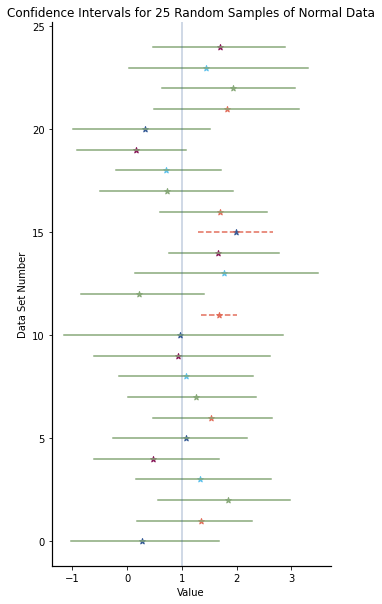

In [9]:
import numpy.random as npr
npr.seed(5678)

num_sims = 25
data_size = 10

X = stats.norm(1,2 )

plt.figure(figsize = (5,10) )
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  avg = Xvals.mean()
  
  # Now do bootstrap sampling
  num_bs_sims = 1000
  bs_averages = np.zeros(num_bs_sims)
  for bs_sim in range(num_bs_sims):
    bs_sample = npr.choice(Xvals, data_size)
    bs_avg = bs_sample.mean()
    bs_averages[bs_sim] = bs_avg
    
  percentiles = np.percentile(bs_averages, [2.5, 97.5])
  if percentiles[0] <= 1 and percentiles[1] >=1:
    plt.plot(percentiles, [sim, sim], color='C2')
  else:
    plt.plot(percentiles, [sim, sim], color='C1', linestyle='--')
  plt.scatter(avg, sim, marker='*')
 
plt.axvline(1, alpha=0.3)
plt.ylabel('Data Set Number');
plt.xlabel('Value');
plt.title('Confidence Intervals for 25 Random Samples of Normal Data')


For the seed I arbitrarily chose, 2 out of 25 confidence intervals did not contain the true mean, which is 8%. In the long run, we expect at least 5% of confidence intervals to not contain the true mean, and the bootstrap estimator for CIs is not conservative enough for small data, so 8% may be accurate. The following simulation provides a more accurate estimate of the probability that the CI contains the true mean by running 1,000 simulations:

In [10]:
num_sims = 2000
data_size = 10

X = stats.norm(1,2 )

num_miss_true_mean = 0
for sim in range(num_sims):
  Xvals = X.rvs(data_size)
  avg = Xvals.mean()
  
  # Now do bootstrap sampling
  num_bs_sims = 1000
  bs_averages = np.zeros(num_bs_sims)
  for bs_sim in range(num_bs_sims):
    bs_sample = npr.choice(Xvals, data_size)
    bs_avg = bs_sample.mean()
    bs_averages[bs_sim] = bs_avg
    
  percentiles = np.percentile(bs_averages, [2.5, 97.5])
  if percentiles[0] > 1 or percentiles[1] <1:
    num_miss_true_mean += 1

print('The probabilty a bootstrap CI does not contain the true mean is' 
      + f'{num_miss_true_mean/num_sims : 0.2f}')

The probabilty a bootstrap CI does not contain the true mean is 0.10


We see that the actual that a bootstrap CI does not contain the true mean for this distribution is around 11%, when our target was 5%. Below is a table that shows the probability[^ci_probs] that a bootstrap sample does not contain the true mean for this distribution as a function of $N$:

| Data Size ($N$) | Probability CI does not contain true mean |
| :-: | :-: |
| 5 | 16.3% |
| 10 | 10.0% |
| 25 | 6.9% |
| 50 | 5.9% |
| 75 | 5.6% |
| 100 | 5.5% |

[^ci_probs]: These probabilities are approximations; they were estimated via simulations of 100,000 random samples of the data for each data size.

In [20]:
from numba import jit


In [21]:
@jit
def sim_ci(data_size=5, num_sims=100_000):

  num_bs_sims = 1000
  X = stats.norm(1,2 )

  num_miss_true_mean = 0
  Xvals = X.rvs((num_sims, data_size))
  avgs = Xvals.mean(axis=1)
  bs_averages = np.zeros(num_bs_sims)
  for sim in range(num_sims):

    # Do bootstrap sampling

    for bs_sim in range(num_bs_sims):
      bs_sample = npr.choice(Xvals[sim], data_size)
      bs_avg = bs_sample.mean()
      bs_averages[bs_sim] = bs_avg

    percentiles = np.percentile(bs_averages, [2.5, 97.5])
    if percentiles[0] > 1 or percentiles[1] <1:
      num_miss_true_mean += 1

  #print('The probabilty a bootstrap CI does not contain the true mean is' 
       # + f'{num_miss_true_mean/num_sims*100 : 0.2f}')
  return num_miss_true_mean/num_sims*100

In [22]:
for data_size in [5, 10, 25, 50, 75, 100]:
  print(data_size, f'{sim_ci(data_size) : 0.1f}' )

/var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_70531/4212116520.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "sim_ci" failed type inference due to: Unknown attribute 'norm' of type Module(<module 'scipy.stats' from '/Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py'>)

File "../../../../../../../../var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_70531/4212116520.py", line 5:
<source missing, REPL/exec in use?>

During: typing of get attribute at /var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_70531/4212116520.py (5)

File "../../../../../../../../var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_70531/4212116520.py", line 5:
<source missing, REPL/exec in use?>

  @jit
/var/folders/gz/d_8lq2wn23x2lmhfh63cfl3400010v/T/ipykernel_70531/4212116520.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "sim_ci" f

5  16.3
10  10.0
25  6.9
50  5.9
75  5.6
100  5.5


Now that we have a better understanding of parameter estimation, we  revisit hypothesis testing for a difference of means in the next section.